<a href="https://colab.research.google.com/github/novandrapawidyaa/Time-Series-WasteTrack-Timbunan-Sampah/blob/main/Data_Sampah_TPA_Semarang_%2B_Cuaca_Machine_Learning_VAR_(Time_Series_Perkiraan_timbunan_sampah).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library python

Langkah pertama yang dilakukan adalah menginstall library yang dibutuhkan dalam pembuatan project ini.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from pylab import rcParams

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Membuat dataframe dari CSV

Langkah selanjutnya adalah memuat dataset yang akan digunakan untuk prediksi. Dalam penelitian ini, kami menggunakan data Jumlah sampah dari TPA Kota Semarang dari tahun 2021 hingga 2022. Selain itu, dataset tersebut juga digabung dengan data suhu T2M dari NASA. Dengan menggabungkan kedua jenis data ini, tujuan kami adalah untuk menganalisis dan memodelkan hubungan antara jumlah sampah dan cuaca.

In [ ]:
# Load in the dataset
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1nJNr5w70zGB-DbWaWnz3Biavjs-yqe9XudyXFagAgyY/export?format=csv")

In [ ]:
df.head()

,Year,Month,Jumlah sampah,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR
0,2021,1,27726357,25.903,23.622,24.763,26.112,4.001,28.178,24.177,18.486,87.524,10.775
1,2021,2,25972150,25.688,23.913,24.800,25.765,3.576,27.700,24.123,18.812,90.087,25.783
2,2021,3,27274067,26.257,23.408,24.832,26.591,4.670,28.906,24.236,18.244,84.823,6.296
3,2021,4,25987925,26.331,23.373,24.849,26.726,5.296,29.272,23.977,18.188,84.379,6.123
4,2021,5,26324717,26.750,23.938,25.344,27.246,5.731,29.879,24.150,18.827,85.123,3.957


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           24 non-null     int64  
 1   Month          24 non-null     int64  
 2   Jumlah sampah  24 non-null     int64  
 3   T2M            24 non-null     float64
 4   T2MDEW         24 non-null     float64
 5   T2MWET         24 non-null     float64
 6   TS             24 non-null     float64
 7   T2M_RANGE      24 non-null     float64
 8   T2M_MAX        24 non-null     float64
 9   T2M_MIN        24 non-null     float64
 10  QV2M           24 non-null     float64
 11  RH2M           24 non-null     float64
 12  PRECTOTCORR    24 non-null     float64
dtypes: float64(10), int64(3)
memory usage: 2.6 KB


# Ubah tipe data jadi DateTime


Beberapa fitur dalam dataset memiliki tipe data int64. Fitur yang berkaitan dengan waktu pada data tersebut memiliki tipe data int64, dengan tipe data tersebut dapat memperlambat proses pembuatan model prediksi. Dua fitur tersebut adalah Year dan Month. Diperlukan perubahan tipe data dari kedua fitur tersebut menjadi satu fitur bertipe data datetime. Selain itu, perlu juga dilakukan penamaan fitur tersebut menjadi "Date" untuk memudahkan pengenalan terhadap fitur tersebut

In [ ]:
df['Date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))

In [ ]:
df.head()

,Year,Month,Jumlah sampah,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,Date
0,2021,1,27726357,25.903,23.622,24.763,26.112,4.001,28.178,24.177,18.486,87.524,10.775,2021-01-01
1,2021,2,25972150,25.688,23.913,24.800,25.765,3.576,27.700,24.123,18.812,90.087,25.783,2021-02-01
2,2021,3,27274067,26.257,23.408,24.832,26.591,4.670,28.906,24.236,18.244,84.823,6.296,2021-03-01
3,2021,4,25987925,26.331,23.373,24.849,26.726,5.296,29.272,23.977,18.188,84.379,6.123,2021-04-01
4,2021,5,26324717,26.750,23.938,25.344,27.246,5.731,29.879,24.150,18.827,85.123,3.957,2021-05-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Year           24 non-null     int64         
 1   Month          24 non-null     int64         
 2   Jumlah sampah  24 non-null     int64         
 3   T2M            24 non-null     float64       
 4   T2MDEW         24 non-null     float64       
 5   T2MWET         24 non-null     float64       
 6   TS             24 non-null     float64       
 7   T2M_RANGE      24 non-null     float64       
 8   T2M_MAX        24 non-null     float64       
 9   T2M_MIN        24 non-null     float64       
 10  QV2M           24 non-null     float64       
 11  RH2M           24 non-null     float64       
 12  PRECTOTCORR    24 non-null     float64       
 13  Date           24 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(10), int64(3)
memory usage: 2.8 KB


# Hanya ambil kolom date, jumlah sampah, T2M

In [ ]:
df = df[['Date', 'Jumlah sampah', 'T2M']].copy()
df.head()

,Date,Jumlah sampah,T2M
0,2021-01-01,27726357,25.903
1,2021-02-01,25972150,25.688
2,2021-03-01,27274067,26.257
3,2021-04-01,25987925,26.331
4,2021-05-01,26324717,26.750


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           24 non-null     datetime64[ns]
 1   Jumlah sampah  24 non-null     int64         
 2   T2M            24 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 704.0 bytes


In [ ]:
df.shape

(24, 3)

In [ ]:
df.describe()

,Jumlah sampah,T2M
count,2.400000e+01,24.000000
mean,2.637571e+07,26.466292
std,1.589743e+06,0.522375
min,2.365675e+07,25.556000
25%,2.536380e+07,26.125500
50%,2.640718e+07,26.451500
75%,2.739098e+07,26.763500
max,2.948760e+07,27.724000


# Ubah kolom date menjadi index

In [ ]:
df.set_index("Date",inplace=True)

<Axes: xlabel='Date'>

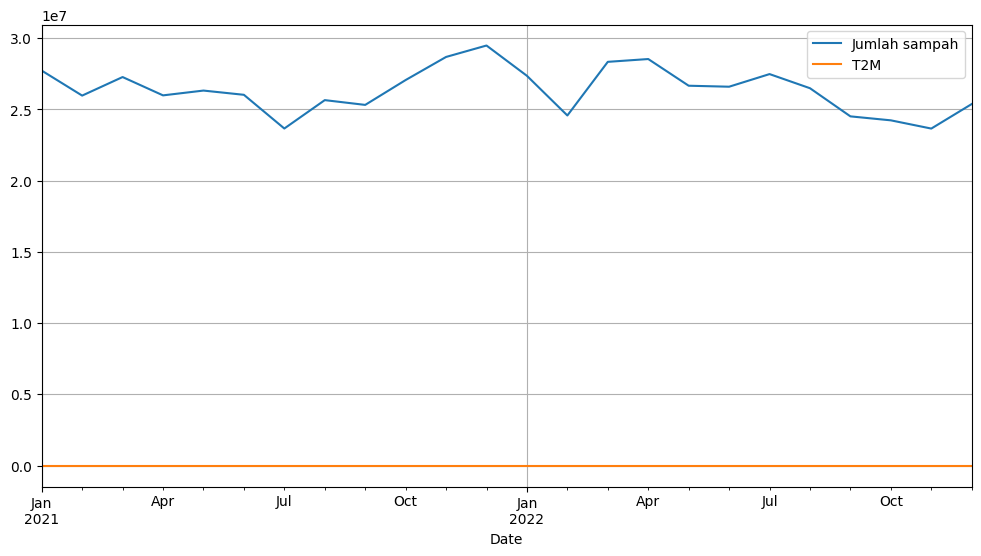

In [ ]:
df.plot(figsize=(12,6), grid=True)

# Cek dickey Fuller

In [ ]:
from statsmodels.tsa.stattools import adfuller
#apply first order differencing to get p-value<0.05
for col in df.columns:
  ad_fuller_result= adfuller(df[col].diff()[1:])
  print(col)
  print(f'ADF Statistic: {ad_fuller_result[0]}')
  print(f'p-value: {ad_fuller_result[1]}')
  print('-----------------------------------')

Jumlah sampah
ADF Statistic: -0.4227476475624631
p-value: 0.9062308941844668
-----------------------------------
T2M
ADF Statistic: -2.357323052829839
p-value: 0.1541455859857257
-----------------------------------


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2021-01-01 to 2022-12-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jumlah sampah  24 non-null     int64  
 1   T2M            24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 576.0 bytes


# Split data training and testing

In [ ]:
train_end = '2022-01-01'
test_end = '2022-12-01'
train_df,test_df = df, df[train_end:]
# train_df,test_df = df[:train_end], df[train_end:]

In [ ]:
print(train_df.shape)
print(test_df.shape)

(24, 2)
(12, 2)


<Axes: xlabel='Date'>

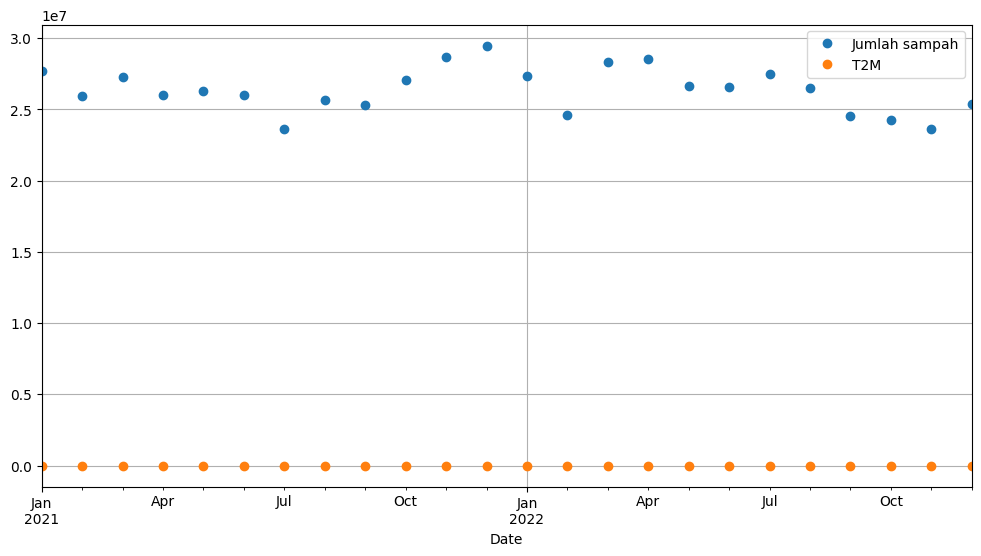

In [ ]:
train_df.plot(figsize=(12,6), style = "o", grid=True)

In [ ]:
train_df

,Jumlah sampah,T2M
Date,,
2021-01-01,27726357,25.903
2021-02-01,25972150,25.688
2021-03-01,27274067,26.257
2021-04-01,25987925,26.331
2021-05-01,26324717,26.750
2021-06-01,26027415,26.266
2021-07-01,23661096,25.938
2021-08-01,25653848,26.865
2021-09-01,25318725,27.250


In [ ]:
test_df

,Jumlah sampah,T2M
Date,,
2022-01-01,27360585,26.204
2022-02-01,24576330,25.938
2022-03-01,28341823,26.589
2022-04-01,28538712,26.798
2022-05-01,26664953,26.752
2022-06-01,26595782,25.918
2022-07-01,27482173,25.556
2022-08-01,26489647,26.188
2022-09-01,24513472,27.174


<Axes: xlabel='Date'>

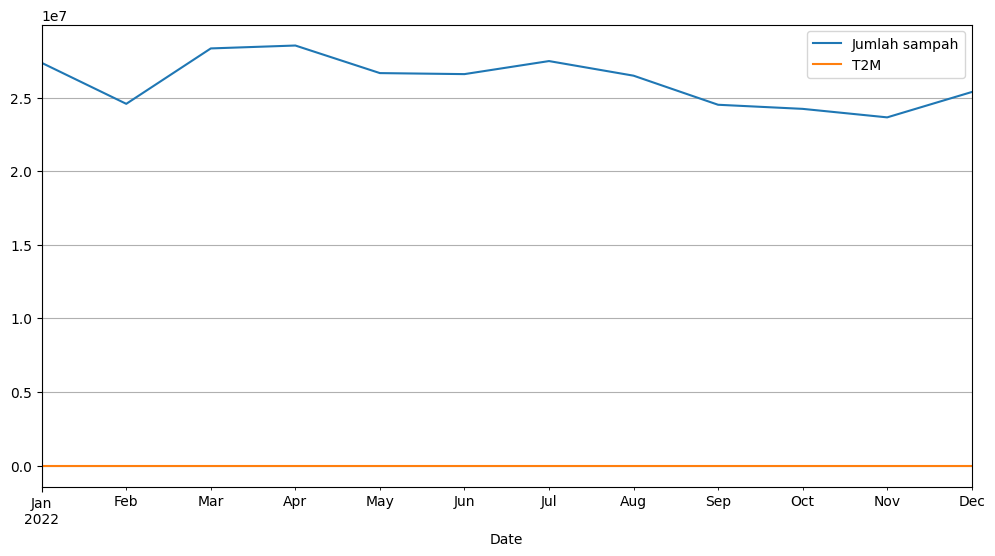

In [ ]:
test_df.plot(figsize=(12,6), grid=True)

In [ ]:
#find out number of lags to consider
from statsmodels.tsa.api import VAR
model = VAR(train_df.diff()[1:])
sorted_order=model.select_order(maxlags=6)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       27.81      27.91*   1.202e+12       27.82
1       28.25       28.55   1.875e+12       28.28
2       28.44       28.93   2.321e+12       28.49
3       27.55       28.24  1.028e+12*       27.62
4       27.69       28.58   1.352e+12       27.78
5       27.66       28.74   1.693e+12       27.77
6      27.18*       28.46   1.687e+12      27.31*
-------------------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Bikin model VAR

In [ ]:
# from statsmodels.tsa.statespace.varmax import VARMAX
# var_model=VARMAX(train_df,order=(6,0),enforce_stationarity=True)
# fitted_model=var_model.fit(disp=False)

In [ ]:
# # Save the model to a file
# joblib.dump(fitted_model, 'tpa_cuaca_var_model.pkl')

In [ ]:
# https://drive.google.com/file/d/1vw8N8IQnV1HPwyBrs8IzK8w2qpVFMdEq/view?usp=drive_link
!gdown 1vw8N8IQnV1HPwyBrs8IzK8w2qpVFMdEq

Downloading...
From: https://drive.google.com/uc?id=1vw8N8IQnV1HPwyBrs8IzK8w2qpVFMdEq
To: /content/tpa_cuaca_var_model.pkl
100% 913k/913k [00:00<00:00, 26.2MB/s]


In [ ]:
# Load the model from the file
fitted_model = joblib.load('tpa_cuaca_var_model.pkl')

In [ ]:
print(fitted_model.summary())

                              Statespace Model Results                              
Dep. Variable:     ['Jumlah sampah', 'T2M']   No. Observations:                   24
Model:                               VAR(6)   Log Likelihood                -383.181
                                + intercept   AIC                            824.363
Date:                      Wed, 26 Jul 2023   BIC                            858.526
Time:                              15:19:33   HQIC                           833.426
Sample:                          01-01-2021                                         
                               - 12-01-2022                                         
Covariance Type:                        opg                                         
Ljung-Box (L1) (Q):             1.69, 2.73   Jarque-Bera (JB):           0.73, 1.03
Prob(Q):                        0.19, 0.10   Prob(JB):                   0.69, 0.60
Heteroskedasticity (H):         1.11, 0.97   Skew:                 

# Prediksi test data

In [ ]:
predict=fitted_model.get_prediction(start=len(train_df)-len(test_df), end=len(train_df)-1)
predictions=predict.predicted_mean
predictions.columns=['Jumlah sampah Prediction','T2M Prediction']
predictions=predictions.abs()
predictions

,Jumlah sampah Prediction,T2M Prediction
2022-01-01,2.796586e+07,26.216863
2022-02-01,2.690822e+07,26.169537
2022-03-01,2.645576e+07,26.321506
2022-04-01,2.682003e+07,26.589018
2022-05-01,2.636461e+07,26.712100
2022-06-01,2.609723e+07,26.330519
2022-07-01,2.653950e+07,26.074015
2022-08-01,2.720796e+07,26.303127
2022-09-01,2.606613e+07,26.544275
2022-10-01,2.529248e+07,26.734293


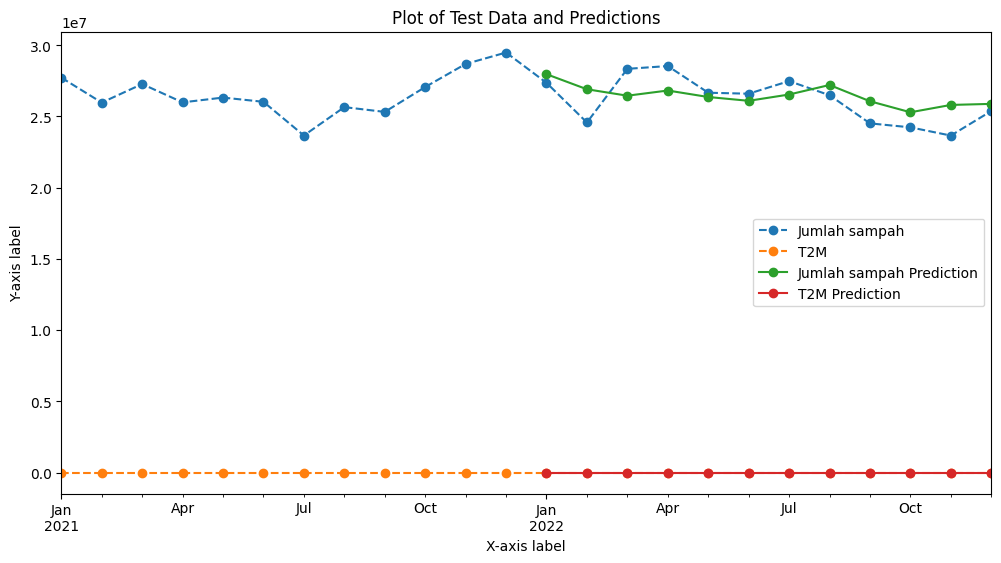

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(ax=ax, linestyle='dashed', marker='o', label='DataFrame 1')
predictions.plot(ax=ax, marker='o', label='DataFrame 2')

# Add labels and title to the plot
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Plot of Test Data and Predictions')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Perform a join on the index
merged_df = test_df.join(predictions)

# Specify the desired column order
column_order = ['Jumlah sampah', 'Jumlah sampah Prediction', 'T2M', 'T2M Prediction']

# Reorder the columns
merged_df = merged_df[column_order]
merged_df

,Jumlah sampah,Jumlah sampah Prediction,T2M,T2M Prediction
Date,,,,
2022-01-01,27360585,2.796586e+07,26.204,26.216863
2022-02-01,24576330,2.690822e+07,25.938,26.169537
2022-03-01,28341823,2.645576e+07,26.589,26.321506
2022-04-01,28538712,2.682003e+07,26.798,26.589018
2022-05-01,26664953,2.636461e+07,26.752,26.712100
2022-06-01,26595782,2.609723e+07,25.918,26.330519
2022-07-01,27482173,2.653950e+07,25.556,26.074015
2022-08-01,26489647,2.720796e+07,26.188,26.303127
2022-09-01,24513472,2.606613e+07,27.174,26.544275


# Cek akurasi model

In [ ]:
import statistics
import math
def avg(arr):
    return sum(arr) / len(arr)

In [ ]:
train_df_a=test_df
train_df_a.columns=['Jumlah sampah Prediction', 'T2M Prediction']

In [ ]:
MSE = []
MAE = []
RMSE = []
RSq = []
cols=predictions.columns
# cols

for col in cols:
  actual=train_df_a[col].to_numpy()
  # print(len(actual))
  pred=predictions[col].to_numpy()
  # print(len(pred))
  d = actual-pred
  mse = avg(d*d)
  mae = avg(abs(d))
  rmse = math.sqrt(mse)
  rsq = 1-(sum((d*d)/sum(pow(actual-avg(actual),2))))
  print("Attribute: ", col)
  print("Mean Square Error: ", mse)
  print("Mean Absolute Error: ", mae)
  print("Root Mean Square Error: ", rmse)
  print("R-Squared Error: ", rsq)
  MSE.append(mse)
  MAE.append(mae)
  RMSE.append(rmse)
  RSq.append(rsq)
  print()

Attribute:  Jumlah sampah Prediction
Mean Square Error:  1872418334741.988
Mean Absolute Error:  1188908.8156765
Root Mean Square Error:  1368363.3781791984
R-Squared Error:  0.2501276785280955

Attribute:  T2M Prediction
Mean Square Error:  0.09218340291464323
Mean Absolute Error:  0.23643621083466262
Root Mean Square Error:  0.3036171979889203
R-Squared Error:  0.5122317497225517



<BarContainer object of 2 artists>

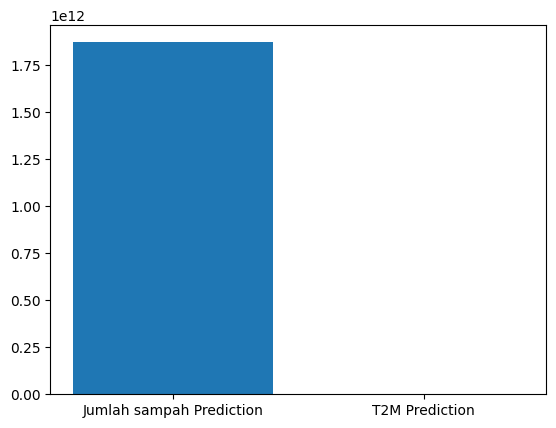

In [ ]:
plt.bar(cols, MSE)

<BarContainer object of 2 artists>

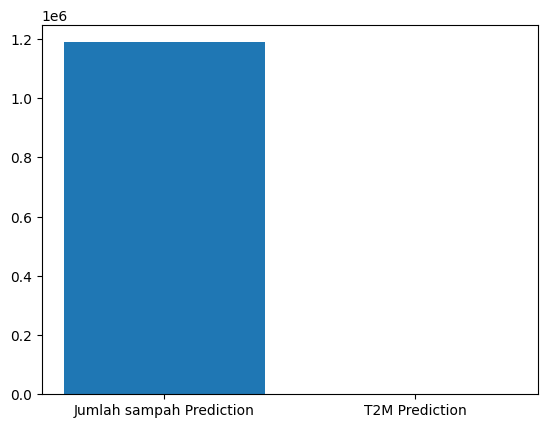

In [ ]:
plt.bar(cols, MAE)

<BarContainer object of 2 artists>

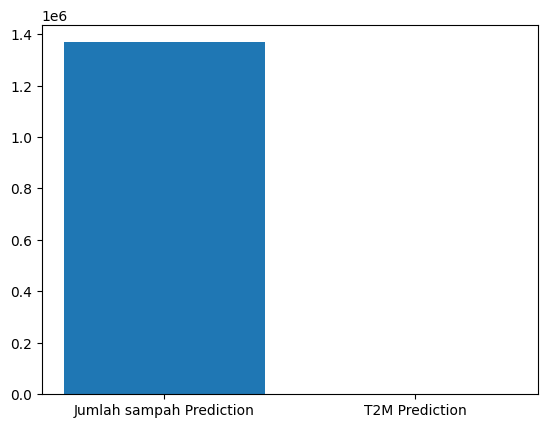

In [ ]:
plt.bar(cols, RMSE)

<BarContainer object of 2 artists>

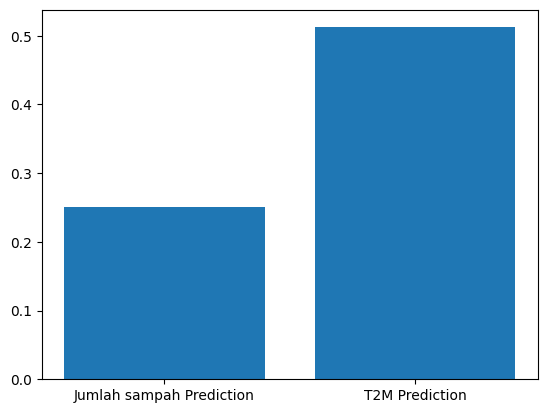

In [ ]:
plt.bar(cols, RSq)

# Bikin prediksi 1 tahun kedepan

In [ ]:
predict=fitted_model.get_prediction(start=len(train_df), end=len(train_df)+11) # +11 karena prediksi 1 tahun kedepan (12 bulan)
predictions=predict.predicted_mean
predictions.columns=['Jumlah Sampah Prediction', 'T2M Prediction']
predictions=predictions.abs()
predictions

,Jumlah Sampah Prediction,T2M Prediction
2023-01-01,2.589490e+07,26.622646
2023-02-01,2.643446e+07,26.753179
2023-03-01,2.701083e+07,26.667558
2023-04-01,2.724616e+07,26.502116
2023-05-01,2.736870e+07,26.406926
2023-06-01,2.696847e+07,26.367583
2023-07-01,2.676885e+07,26.401993
2023-08-01,2.659649e+07,26.437694
2023-09-01,2.641676e+07,26.466815
2023-10-01,2.630686e+07,26.479750


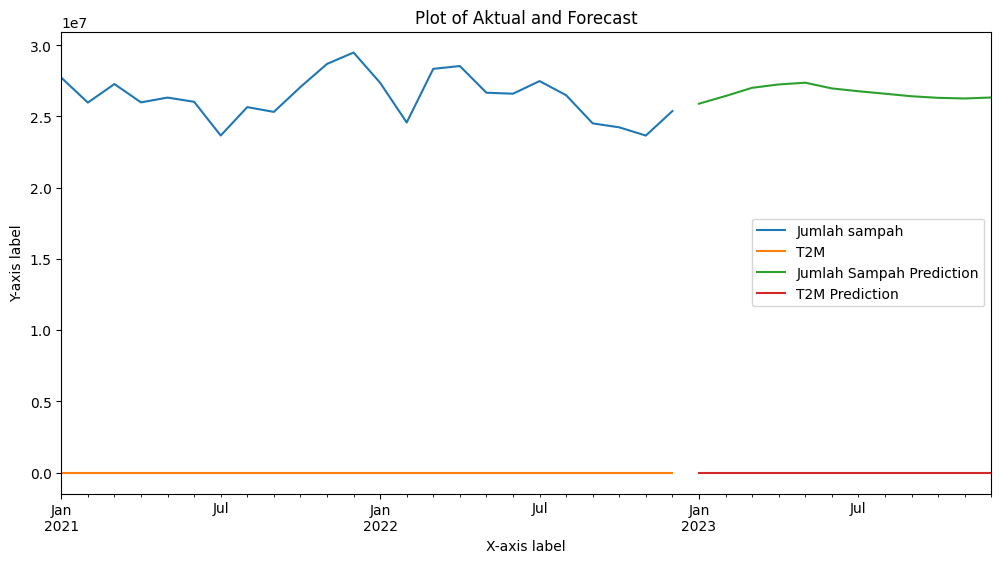

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(ax=ax, label='Aktual')
predictions.plot(ax=ax, label='Forecast')

# Add labels and title to the plot
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Plot of Aktual and Forecast')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# # Create the plot
# fig, ax = plt.subplots(figsize=(12, 6))
# df['T2M'].plot(ax=ax, label='Aktual')
# predictions['T2M Prediction'].plot(ax=ax, label='Forecast')

# # Add labels and title to the plot
# plt.xlabel('X-axis label')
# plt.ylabel('Y-axis label')
# plt.title('Plot of Aktual and Forecast')

# # Add legend
# plt.legend()

# # Display the plot
# plt.show()

# Final DataFrame

In [ ]:
# # Merge the DataFrames
# final_df = pd.merge(df, predictions, left_index=True, right_index=True, how='outer')
# final_df = final_df.drop('Timbunan sampah rata-rata perhari', axis=1)
# final_df = final_df.drop('Timbunan sampah rata-rata perhari Prediction', axis=1)
# final_df = final_df.rename(columns={'Jumlah sampah Prediction': 'Prediksi Jumlah Sampah'})
# final_df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2021-01-01 to 2022-12-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jumlah sampah  24 non-null     int64  
 1   T2M            24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [ ]:
df.describe()

,Jumlah sampah,T2M
count,2.400000e+01,24.000000
mean,2.637571e+07,26.466292
std,1.589743e+06,0.522375
min,2.365675e+07,25.556000
25%,2.536380e+07,26.125500
50%,2.640718e+07,26.451500
75%,2.739098e+07,26.763500
max,2.948760e+07,27.724000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
import math
